In [1]:
import numpy as np
from scipy.io import loadmat
import matplotlib.pyplot as plt 
from sklearn.svm import LinearSVC
import numpy.random
import math

In [2]:
def ista_solve_hot( A, d, la_array ):
    # ista_solve_hot: Iterative soft-thresholding for multiple values of
    # lambda with hot start for each case - the converged value for the previous
    # value of lambda is used as an initial condition for the current lambda.
    # this function solves the minimization problem
    # Minimize |Ax-d|_2^2 + lambda*|x|_1 (Lasso regression)
    # using iterative soft-thresholding.
    max_iter = 10**4
    tol = 10**(-3)
    tau = 1/np.linalg.norm(A,2)**2
    n = A.shape[1]
    w = np.zeros((n,1))
    num_lam = len(la_array)
    X = np.zeros((n, num_lam))
    for i, each_lambda in enumerate(la_array):
        for j in range(max_iter):
            z = w - tau*(A.T@(A@w-d))
            w_old = w
            w = np.sign(z) * np.clip(np.abs(z)-tau*each_lambda/2, 0, np.inf)
            X[:, i:i+1] = w
            if np.linalg.norm(w - w_old) < tol:
                break
    return X

In [5]:
in_data = loadmat('BreastCancer.mat')
X = in_data['X']
y = in_data['y']

In [6]:
print(X.shape, y.shape)

(295, 8141) (295, 1)


#### a)

In [7]:
# We will use the first 100 patients
X_train = X[:100]
y_train = y[:100]
# Set lambda array with range (1e-6, 20) spaced logaritmically
lambda_array = []
i = 1e-6
while i < 19:
    lambda_array.append(i)
    i += math.log(2)
lambda_array.append(20)
w = ista_solve_hot(X_train, y_train, lambda_array)

w_norm:  36.109055952630406 	residual_error:  122.62017023893092 	lambda:  1e-06
w_norm:  18.1266980593891 	residual_error:  117.3028693792493 	lambda:  0.6931481805599453
w_norm:  13.51150995902426 	residual_error:  113.75422580631017 	lambda:  1.3862953611198905
w_norm:  11.207473857087024 	residual_error:  110.96552155127395 	lambda:  2.079442541679836
w_norm:  9.600042255143801 	residual_error:  108.64335521508443 	lambda:  2.7725897222397813
w_norm:  8.425137987735571 	residual_error:  106.67098689091421 	lambda:  3.4657369027997267
w_norm:  7.504537201776889 	residual_error:  104.93988316904763 	lambda:  4.158884083359672
w_norm:  6.785326085022339 	residual_error:  103.44476518158844 	lambda:  4.852031263919617
w_norm:  6.123578969469852 	residual_error:  102.12035118812786 	lambda:  5.545178444479562
w_norm:  5.579710963832548 	residual_error:  100.97384444664706 	lambda:  6.238325625039508
w_norm:  5.137386633432994 	residual_error:  99.97513990804859 	lambda:  6.9314728055994

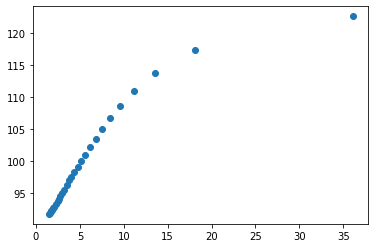

In [8]:
residual_error = []
w_norm = []
for i in range(len(lambda_array)):
    residual_error.append(np.linalg.norm(X_train@w[:,i] - y_train))
    w_norm.append(abs(w[:,i]).sum())
    print("w_norm: " , w_norm[i],"\tresidual_error: ", residual_error[i], "\tlambda: ", lambda_array[i])
plt.scatter(x=w_norm, y=residual_error)
plt.show()
# As lambda increases the residual error and the norm of w decreases 

In [17]:
At = X[:100,:]
bt = y[:100,:]

Av = X[100:,:]
bv = y[100:,:]

lam_vals = [12-6, 1e-4, 1e-2, 1e-1]
lam_vals = np.hstack((lam_vals, np.logspace(0,2,num=20)))

number = lam_vals.shape[0]

W = ista_solve_hot(At, bt, lam_vals)

err = []
res = []
norm = []
nonz = []

errv = []
resv = []

for i in range(number):
    err.append(np.mean(np.sign(At@W[:,i:i+1])!= bt))
    res.append(np.linalg.norm(At@W[:,i:i+1]-bt)**2)
    norm.append(np.linalg.norm(W[:,i],1))
    nonz.append(np.sum(abs(W[:,i])>1e-8))
    
    errv.append(np.mean(np.sign(Av@W[:,i:i+1])!= bv))
    resv.append(np.linalg.norm(Av@W[:,i:i+1]-bv)**2)

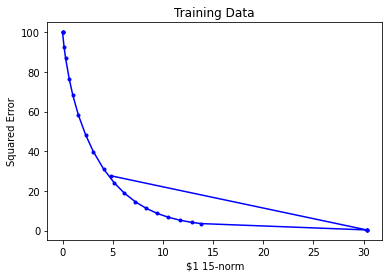

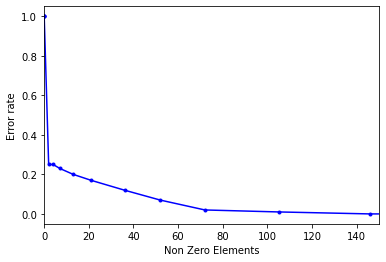

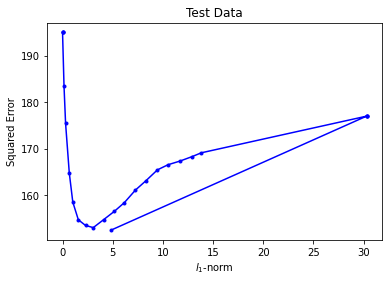

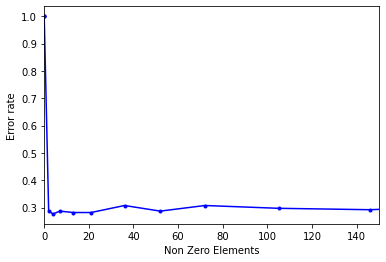

In [18]:
plt.figure()
plt.plot(norm,res,"b.-")
plt.xlabel('$1 15-norm');
plt.ylabel('Squared Error');
plt.title('Training Data')
plt.show()

plt.figure()
plt.plot(nonz,err,"b.-")
plt.xlim([0,150])
plt.xlabel('Non Zero Elements')
plt.ylabel('Error rate')
plt.show()

plt.figure()
plt.plot(norm,resv,"b.-")
plt.xlabel('$l_1$-norm');
plt.ylabel('Squared Error');
plt.title('Test Data')
plt.show()

plt.figure()
plt.plot(nonz,errv,"b.-")
plt.xlim([0,150])
plt.xlabel('Non Zero Elements')
plt.ylabel('Error rate')
plt.show()


#### b)


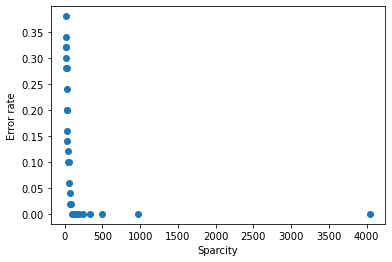

In [246]:
error_rate = []
sparcity = np.zeros(len(lambda_array))
for i in range(len(lambda_array)):
    diff = abs(np.sign(X_train@w[:,i]) - y_train[:,0])
    for j in w[:,i]:
        # Add to count the number of nonzero entries of w => if |w|_i > 1e-6
        if j > 1e-6:
            sparcity[i] += 1
    error_rate.append(diff.sum()/len(diff))
plt.scatter(x=sparcity, y=error_rate)
plt.xlabel("Sparcity")
plt.ylabel("Error rate")
plt.show()
# As the number of nonzero entries in w increases => the error rate decreases

#### c)

In [247]:
X_test = X[101:]
y_test = y[101:]

w_norm:  36.109055952630406 	residual_error:  201.21304378897253 	lambda:  1e-06
w_norm:  18.1266980593891 	residual_error:  197.91570675411856 	lambda:  0.6931481805599453
w_norm:  13.51150995902426 	residual_error:  195.93637747867436 	lambda:  1.3862953611198905
w_norm:  11.207473857087024 	residual_error:  194.34688419042368 	lambda:  2.079442541679836
w_norm:  9.600042255143801 	residual_error:  192.82475715297167 	lambda:  2.7725897222397813
w_norm:  8.425137987735571 	residual_error:  191.78903343197146 	lambda:  3.4657369027997267
w_norm:  7.504537201776889 	residual_error:  190.782753642679 	lambda:  4.158884083359672
w_norm:  6.785326085022339 	residual_error:  189.77979622919315 	lambda:  4.852031263919617
w_norm:  6.123578969469852 	residual_error:  188.87130033785922 	lambda:  5.545178444479562
w_norm:  5.579710963832548 	residual_error:  187.91498643542022 	lambda:  6.238325625039508
w_norm:  5.137386633432994 	residual_error:  187.08197273897952 	lambda:  6.9314728055994

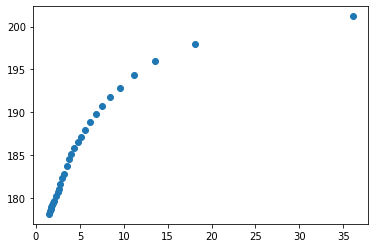

In [253]:
# a)
residual_error = []
w_norm = []
for i in range(len(lambda_array)):
    residual_error.append(np.linalg.norm(X_test@w[:,i] - y_test))
    w_norm.append(abs(w[:,i]).sum())
    print("w_norm: " , w_norm[i],"\tresidual_error: ", residual_error[i], "\tlambda: ", lambda_array[i])
plt.scatter(x=w_norm, y=residual_error)
plt.show()
# As with the train data, as lambda increases the residual error and the norm-1 of w decreases. 
# However, the plot show a more curved graph with it's point with a more distance between them

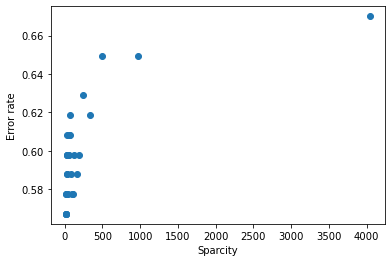

In [252]:
# b)
error_rate = []
sparcity = np.zeros(len(lambda_array))
for i in range(len(lambda_array)):
    diff = abs(np.sign(X_test@w[:,i]) - y_test[:,0])
    for j in w[:,i]:
        # Add to count the number of nonzero entries of w => if |w|_i > 1e-6
        if j > 1e-6:
            sparcity[i] += 1
    error_rate.append(diff.sum()/len(diff))
plt.scatter(x=sparcity, y=error_rate)
plt.xlabel("Sparcity")
plt.ylabel("Error rate")
plt.show()
# Now, the error rate vs sparcity behaves completely different as before. As the sparcity increases, the error
# rate increases with it. 